# Practice exercise I

### Loading and Understanding Data

Today we will be dealing with stock market and <code>**Google**</code> a.k.a <code>**Alphabet Inc.**</code> stock price. 

In [8]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as net


In [343]:
start = dt.datetime(2005, 1, 1)
end   = dt.datetime(2021, 1, 1)
df    = net.DataReader('GOOGL', 'yahoo', start, end)
data  = df.sort_index(ascending=False)

In [345]:
print(data.head())

                   High          Low         Open        Close     Volume  \
Date                                                                        
2020-12-31  1757.500000  1736.089966  1737.270020  1752.640015  1052900.0   
2020-12-30  1767.760010  1728.000000  1765.000000  1736.250000  1051300.0   
2020-12-29  1788.469971  1755.109985  1787.229980  1757.760010   986300.0   
2020-12-28  1787.000000  1741.819946  1744.910034  1773.959961  1382500.0   
2020-12-24  1742.410034  1724.349976  1729.000000  1734.160034   465600.0   

              Adj Close  
Date                     
2020-12-31  1752.640015  
2020-12-30  1736.250000  
2020-12-29  1757.760010  
2020-12-28  1773.959961  
2020-12-24  1734.160034  


Lets store our data into csv file for further usage and analysis. This is done quite easily with pandas dataframe method <code>**to_csv()**</code>

In [73]:
data.to_csv('goog.csv')

We will have a slight issue with our index because our date now is index. It was converted in our favour like that by <code>**DataReader()**</code> method. But normally when we read in let's say csv file its just a text file that doesn't have a column that is the index.

In [74]:
df = pd.read_csv('goog.csv')
df.head()

Date         High          Low         Open        Close     Volume  \
0  2020-12-31  1757.500000  1736.089966  1737.270020  1752.640015  1052900.0   
1  2020-12-30  1767.760010  1728.000000  1765.000000  1736.250000  1051300.0   
2  2020-12-29  1788.469971  1755.109985  1787.229980  1757.760010   986300.0   
3  2020-12-28  1787.000000  1741.819946  1744.910034  1773.959961  1382500.0   
4  2020-12-24  1742.410034  1724.349976  1729.000000  1734.160034   465600.0   

     Adj Close  
0  1752.640015  
1  1736.250000  
2  1757.760010  
3  1773.959961  
4  1734.160034

Lets handle that, but just for better understanding of all plausable parameters you have with pandas <code>**read_csv()**</code> go checkout this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) from pandas documentation. What we interested is <code>**parse_dates**</code> option and we want to specify index column and thats <code>**index_col**</code> option. And now we actually have our data with <code>**date time index**</code> in our csv file. Also we can read not only csv but json, sql, xml, xlsx and forth on. Check out pandas documentation it's higly extensive.

In [75]:
df = pd.read_csv('goog.csv', parse_dates=True, index_col=0)

df.head()

High          Low         Open        Close     Volume  \
Date                                                                        
2020-12-31  1757.500000  1736.089966  1737.270020  1752.640015  1052900.0   
2020-12-30  1767.760010  1728.000000  1765.000000  1736.250000  1051300.0   
2020-12-29  1788.469971  1755.109985  1787.229980  1757.760010   986300.0   
2020-12-28  1787.000000  1741.819946  1744.910034  1773.959961  1382500.0   
2020-12-24  1742.410034  1724.349976  1729.000000  1734.160034   465600.0   

              Adj Close  
Date                     
2020-12-31  1752.640015  
2020-12-30  1736.250000  
2020-12-29  1757.760010  
2020-12-28  1773.959961  
2020-12-24  1734.160034

Quick trick is that we don't have to deal with <code>**matplotlib pyplot**</code> to quickly visualize our data. Panda dataframe <code>**plot()**</code> method. In case you are running this not in jupyter notebook add <code>**plt.show()**</code> at the end.

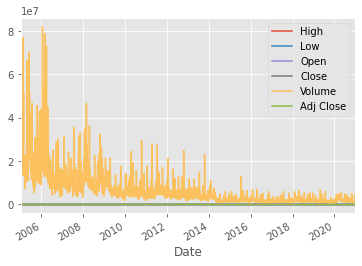

In [349]:
df.plot()

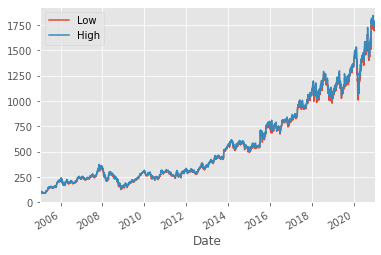

In [350]:
df[['Low', 'High']].plot()

In ML supervised learning everything is labels and features and our case features are continues data. If you are intersted in machine learning implementation in finance and economics it would be usefull to look for a good fidelity and preferably free data source. Its quite hard to find a <code>**[financial data vendor](https://en.wikipedia.org/wiki/Financial_data_vendor)**</code> that doesn't charge for it services but as starting point just try surfing internet. Some [websites](https://www.g2.com/categories/financial-data-apis/free) provide some information about some of these platforms that are free of charge with some limitations.
Im going to use <code>**[Quandl](https://www.quandl.com/)**</code> service, there are some options that you can use their service without register account but its strictly limited and has very low rate for request per day.

In [5]:
import quandl as qdl
import math
qdl.ApiConfig.api_key = 'x9d-7DzcK7H4xMFVytLP'
df = qdl.get('WIKI/GOOG')
print(df)

                Open     High      Low    Close     Volume  Ex-Dividend  \
Date                                                                      
2014-03-27   568.000   568.00   552.92   558.46    13100.0          0.0   
2014-03-28   561.200   566.43   558.67   559.99    41100.0          0.0   
2014-03-31   566.890   567.00   556.93   556.97    10800.0          0.0   
2014-04-01   558.710   568.45   558.71   567.16     7900.0          0.0   
2014-04-02   565.106   604.83   562.19   567.00   146700.0          0.0   
...              ...      ...      ...      ...        ...          ...   
2018-03-21  1092.740  1106.30  1085.15  1090.88  1640709.0          0.0   
2018-03-22  1081.880  1082.90  1045.91  1049.08  2580374.0          0.0   
2018-03-23  1047.030  1063.36  1021.22  1021.57  2113497.0          0.0   
2018-03-26  1046.000  1055.63  1008.40  1053.21  2558385.0          0.0   
2018-03-27  1063.000  1064.84   996.92  1005.10  3029471.0          0.0   

            Split Ratio 

### Feature Engineering

So our features in this particulalr <code>**goog**</code> stock tick data are <code>**High,Low,Open,Close,Volume,Adj Close**</code> but for our model to be as best as it can we want to have meaningful features that has something to do wit our data. Can we figure out some relationship between this data columns ? Or simplify our data as much as possible and try to get as much as we can meaningfull features. But one thing to note is that we must get rid of useless features that will only bring unnecessary complexity to our prediction or classifier model. In our particular case it looks that these useless feature are <code>**Ex-Dividend, Split Ratio,Open, High,Low, Close, Volume**</code>

Let's grab some features by creating columns for those features recreating our initial dataframe. And as you might guess some of those columns are relatively worthless but they do have some relationship. Like say Adj. High and Adj. Low difference (margin) tells us about the <code>**volatility**</code>. The the margin between Adj. Open and Adj. Close prices tells did the price go up or down and by how much. Simple linear regression will not seek out these relationships its just gona work with what features we will feed in. The relationship between data is very valuable but you have to figure it out by having as said in previous lectures some insight about the data itself and what does it represent. Lets define these new features

In [6]:
# Features that we keep
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

# Features that we create
# 1) high - low percentage change feature, sort of percent volatility
df['HLP'] = (df['Adj. High'] - df['Adj. Close']) / (df['Adj. Close'] * 100)
# 2) daily percentage change that represents daily move
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100 

Define columns that will actaully have some meaning for model. But in reality (trading markets) you have to think pretty logical about what features to choose.

In [7]:
df = df[['Adj. Close', 'HLP', 'PCT_change', 'Adj. Volume']]

In [21]:
df

Adj. Close       HLP  PCT_change  Adj. Volume
Date                                                     
2014-03-27      558.46  0.000171   -1.679577      13100.0
2014-03-28      559.99  0.000115   -0.215609      41100.0
2014-03-31      556.97  0.000180   -1.749899      10800.0
2014-04-01      567.16  0.000023    1.512413       7900.0
2014-04-02      567.00  0.000667    0.335158     146700.0
...                ...       ...         ...          ...
2018-03-21     1090.88  0.000141   -0.170214    1640709.0
2018-03-22     1049.08  0.000322   -3.031760    2580374.0
2018-03-23     1021.57  0.000409   -2.431640    2113497.0
2018-03-26     1053.21  0.000023    0.689293    2558385.0
2018-03-27     1005.10  0.000594   -5.446849    3029471.0

[1007 rows x 4 columns]

Let plot our features as a function of dates, which are saved in the index of our data frame. Since the shares prices are almost linearly rising with time, it looks like linear regression should give us a reasonably good prediction, maybe.

Text(0.5, 1.0, 'Daily percentage change')

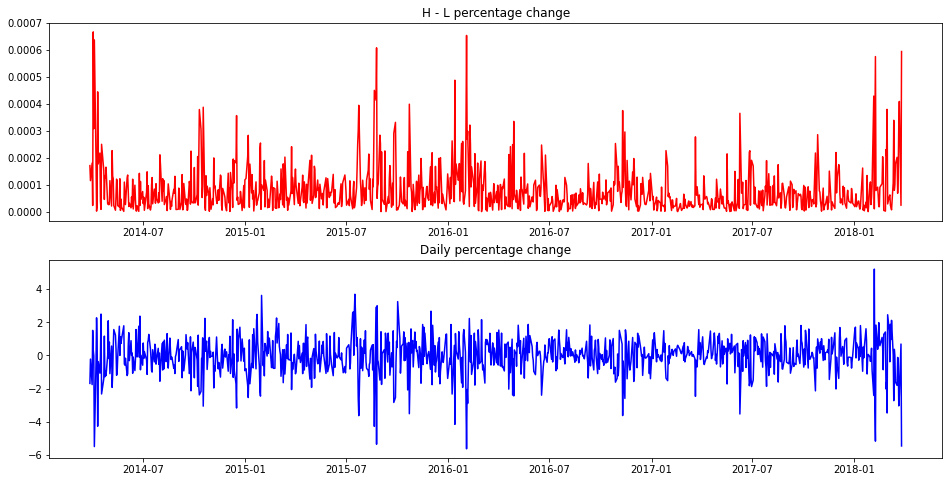

In [20]:
fig, ax = plt.subplots(2,figsize=(16, 8))
ax[0].plot(df['HLP'], c="r")
ax[0].set_title('H - L percentage change')
ax[1].plot(df['PCT_change'], c='b')
ax[1].set_title('Daily percentage change')

In [22]:
df.head()

Adj. Close       HLP  PCT_change  Adj. Volume
Date                                                     
2014-03-27      558.46  0.000171   -1.679577      13100.0
2014-03-28      559.99  0.000115   -0.215609      41100.0
2014-03-31      556.97  0.000180   -1.749899      10800.0
2014-04-01      567.16  0.000023    1.512413       7900.0
2014-04-02      567.00  0.000667    0.335158     146700.0

We have to define our label, the thing that we want to predict and thats the price. Why can we choose Adj.Close columns as our labels ? 



In [23]:
y = 'Adj. Close'

Some data preprocessing to get rid of <code>**NaN**</code> occurances. We can not work in ML with data that is NaN and we have to replace it with something or get rid of it entirely by deleting column/row. But best choice us rather we don't get rid of data we just make it as an <code>**outlier**</code> in our data set.

In [24]:
df.fillna(-9999, inplace=True)

Lets split our data and just predict 10% of prices by making a shift.

In [10]:
shift_size = 0.1
forecast   = math.ceil(shift_size*len(df))
forecast

343

We have to shift our label column negatively image that it just goes up. Thus in each row each Adj. Close is going to be some time in future <code>**(time frame neither time series is not specified yet).**</code> More info about pandas dataframe<code>**[shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)**</code>

In [11]:
df['label'] = df[y].shift(-forecast)
df.dropna(inplace=True)
df.head(36)

Adj. Close       HLP  PCT_change  Adj. Volume       label
Date                                                                 
2004-08-19   50.322842  3.712563    0.324968   44659000.0  214.005615
2004-08-20   54.322689  0.710922    7.227007   22834300.0  210.725489
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  208.072299
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  218.288837
2004-08-25   53.164113  1.886792    1.183658    9188600.0  223.309335
2004-08-26   54.122070  0.037068    2.820391    7094800.0  226.318624
2004-08-27   53.239345  2.326896   -1.803885    6211700.0  233.550949
2004-08-30   51.162935  3.411430   -3.106003    5196700.0  234.172919
2004-08-31   51.343492  1.308977    0.048866    4917800.0  235.607297
2004-09-01   50.280210  2.713217   -2.385589    9138200.0  236.545192
2004-09-02   50.912161  0.847207    2.442224   15118600.0  232.532806
2004-09-03   50.159839  1.729827   -0.931154    5152400.0  233.846863
2004-09-07   50.947269  0.413467    0.564301    5847500.0  234.278194
2004-09-08   51.308384  0.713587    1.548541    4985600.0  223.143773
2004-09-09   51.313400  0.390969   -0.185366    4061700.0  218.898218
2004-09-10   52.828075  1.167758    3.804080    8698800.0  200.348507
2004-09-13   53.916435  0.846512    0.815905    7844100.0  214.411869
2004-09-14   55.917612  0.457440    3.769546   10828900.0  222.200913
2004-09-15   56.173402  1.991071    1.302460   10713000.0  217.170384
2004-09-16   57.161452  1.605686    1.450952    9266300.0  217.804843
2004-09-17   58.926902  0.000000    2.683097    9472500.0  217.416143
2004-09-20   59.864797  1.876676    2.060710   10628700.0  214.070816
2004-09-21   59.102444  2.189409   -1.963394    7228700.0  216.999908
2004-09-22   59.373280  1.089711    0.791826    7581200.0  201.512048
2004-09-23   60.597057  1.498096    1.666106    8535600.0  198.633162
2004-09-24   60.100525  3.563381   -0.942382    9123400.0  191.368235
2004-09-27   59.313094  2.215457   -1.087320    7066100.0  193.146224
2004-09-28   63.626409  0.425666    4.713165   16929000.0  184.529625
2004-09-29   65.742942  3.005798    3.595985   30516400.0  185.111421
2004-09-30   65.000651  2.083333   -0.230179   13758000.0  179.940459
2004-10-01   66.495265  1.252074    1.360856   15124800.0  181.866404
2004-10-04   67.739104  1.340145   -0.158936   13022700.0  173.385224
2004-10-05   69.399229  0.115632    2.755087   14973200.0  172.191539
2004-10-06   68.752232  0.999416   -0.428561   13381400.0  171.720083
2004-10-07   69.639972  0.741808    1.676919   14115000.0  183.797365
2004-10-08   69.078238  1.415814   -0.720825   11069500.0  184.945910

In [12]:
df.tail()

Adj. Close       HLP  PCT_change  Adj. Volume    label
Date                                                              
2016-11-04      781.10  0.944821    1.270582    1970603.0  1094.00
2016-11-07      802.03  0.370310    0.890622    1992570.0  1053.15
2016-11-08      811.98  0.500012    1.240602    1769069.0  1026.55
2016-11-09      805.59  0.759692    0.468927    3098510.0  1054.09
2016-11-10      780.29  3.815248   -3.667901    5909609.0  1006.94

For [features scaling](./__linear_regression_IV.ipynb) we will use sklearn library preporcessing tools unless you want to do it manually I advise to try always exploit available tools for mundane operations for processing speed and other properties. We will use cross_validation tools for train and test sample data split and data shuffling to avoid having statiscally biased samples.

In [13]:
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression

In [32]:
X = np.array(df.drop(['label', 'Adj. Close'], 1))
y = np.array(df['label'])

array([[127.49],
       [129.41],
       [131.81],
       [131.07],
       [130.95],
       [129.89],
       [130.5 ],
       [129.18],
       [133.7 ],
       [132.89],
       [133.26],
       [138.41],
       [138.6 ],
       [137.39],
       [140.11],
       [139.52],
       [138.96],
       [142.45],
       [141.22],
       [140.71],
       [140.78],
       [139.2 ],
       [140.25],
       [140.97],
       [144.  ],
       [144.74],
       [144.14],
       [144.82],
       [143.2 ],
       [140.82],
       [142.27],
       [142.01],
       [142.22],
       [142.6 ],
       [143.86],
       [142.78],
       [143.25],
       [143.41],
       [142.13],
       [142.65],
       [139.53],
       [139.14],
       [141.94],
       [141.43],
       [140.32],
       [140.53],
       [140.89],
       [143.52],
       [143.19],
       [145.25],
       [144.39],
       [145.11],
       [145.83],
       [142.42],
       [142.65],
       [141.84],
       [142.02],
       [144.06],
       [145.17

Normalize all features by scalling them alongside all values

In [34]:
X = preprocessing.scale(X)

In [35]:
def test_data_size(X, y):
    if (len(X) == len(y)):
        print('we are good to go')
    else:
        print(f'lenght of X: {len(X)} \n')
        print(f'lenght of y: {len(y)}')
test_data_size(X, y)

we are good to go


<code>**test_size**</code> param is the test data sample size in relation to entire data set. <code>**train_test_split**</code> is going to shuffle our data set keeping X's and y's connected. And outputs a <code>**X_train**</code>  and <code>**y_train**</code>  to fit our model.

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Lets test our accuracy of model. We have splitted data and use seperate sets to train and test to <code>**on data that it has yet not seen**</code> otherwise model will know exactly what the answer(prediction).

In [22]:
accuracy = lr.score(X_test, y_test)
print(f'model accuracy is {accuracy} for {forecast} day(s) in advance')

model accuracy is 0.890624624571347 for 343 day(s) in advance


Thats our mean square error but it will not make as rich, yet :). We will get into this quite later but what we can be confident about is that directionally its seems to be quite accurate, that means it's able to  sort of<code>**predict the trend**</code> 

Just for comaprison reason for accuracy score lets try something new that you're not yet familiar with. That is <code>**[SVM (support vector machine algorithm)](https://en.wikipedia.org/wiki/Support-vector_machine)**</code>

In [23]:
from sklearn import svm
svm_1 = svm.SVR()
svm_1.fit(X_train, y_train)
accuracy = svm_1.score(X_test, y_test)
print(f'model accuracy is {accuracy} for {forecast} day(s) in advance')

model accuracy is 0.712970872916322 for 343 day(s) in advance


Well it doesn't perform some well as linear regression. Maybe if we change it to use <code>**[polynomial kernel](https://en.wikipedia.org/wiki/Polynomial_kernel)**</code> it will perform at least somewhat better, maybe.

In [375]:
svm_2 = svm.SVR(kernel='poly')
svm_2.fit(X_train, y_train)
accuracy = svm_2.score(X_test, y_test)
print(f'model accuracy is {accuracy} for {forecast} day(s) in advance')

model accuracy is 0.645760811952144 for 35 day(s) in advance


Well it got even worse. That happens, we need to fiddle more with those parameters to get something in a reasonable usage range. Anyway lets get back at linear regression, there is quite important feature in sklearn library on linear regression model. Its <code>**[n_jobs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)**</code>. This means it can be threaded and thats very important feature of algorithm for it to be run in parallel operations. Its very usefull when we have implement a model that requires tons of calculations and we have server that has enough feasible hardware power to perfom this as threaded operation.

Lets try to predict some feature with our model and our current data. I made a repeat of code above with slight changes.

In [44]:
df = qdl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
label = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast = math.ceil(0.01 * len(df))
df['label'] = df[label].shift(-forecast)
X = np.array(df.drop(['label', 'Adj. Close'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast:]
X = X[:-forecast]

df.dropna(inplace=True)
y=np.array(df['label'])

In [45]:
test_data_size(X, y)

we are good to go


In [46]:
forecast

35

In [47]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
print(f'model accuracy is {accuracy} for {forecast} day(s) in advance')

model accuracy is 0.30777604332077024 for 35 day(s) in advance


So to predict based on X data is quite easy with sklearn linear regression model and <code>**[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict)**</code> method. We can pass a single or an array of values to make a prediction per value in that array. So we have our <code>**forecast**</code> variable that is 35 days long and we made <code>**X_lately = X[-forecast:]**</code> value arrays that we want to predict.

In [48]:
forecast_set = lr.predict(X_lately)
print(f'stock price value predictions: \n {forecast_set} \n with accuracy of: {accuracy} \n for: {forecast} days')

stock price value predictions: 
 [458.60566586 503.90172272 486.00487395 453.08171718 500.33506004
 522.29866855 507.08582817 512.41559974 515.18661588 514.97945919
 508.80238919 525.46569178 524.86307408 522.76053077 513.34561883
 507.52563283 496.29051619 492.85566641 516.25659241 531.70328881
 514.94180689 522.50604358 506.61506223 512.31290077 507.02654774
 514.08045684 517.30635583 504.11654527 494.0846327  500.85605325
 512.88696137 487.72309351 500.2640364  478.18770253 484.68727983] 
 with accuracy of: 0.30777604332077024 
 for: 35 days


Lets graph that

In [49]:
df['Prediction'] = np.nan

Let's make date values and populate dataframe with it and prediction values. This nasty stuff is to get dates on the axis 

In [50]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one       = 86400
next_unix = last_unix + one

for i in forecast_set:
    next_date = dt.datetime.fromtimestamp(next_unix)
    next_unix += one
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

<IPython.core.display.Javascript object>


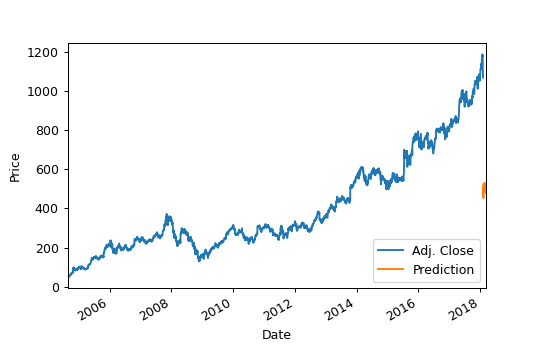

Text(0, 0.5, 'Price')

In [51]:
%matplotlib notebook
df['Adj. Close'].plot()
df['Prediction'].plot()
plt.legend(loc=4)

plt.xlabel('Date')
plt.ylabel('Price')

So predictin company that price is 1.392 Trilion $  [Google stock price](https://finance.yahoo.com/quote/GOOGL/) will take much more than this. Firslyt most important is to rationalize why this company has this value, how did it got so valuable and what actually drives its stock price. To understand underlying market movements logic it necessary to go much deeper into <code>**finance and economics**</code>.

## Scaling and saving

Saving is also called pickeling, <code>**[pickle](https://docs.python.org/3/library/pickle.html)**</code> which is a <code>**serialization and de-serialization**</code> of any data structure/object like dictionary and forth on. In our case it might be our model that we want to serialize. It works pretty straight forward its like a file that when you want you can open/save/read it.

In [333]:
import pickle

The purpose to save model is to avoid doing the training again that takes the most of time. In our case it doesn't take that long but we don't have much data neither model complexity. But just image if we scaled our data to tons of GB's or TB's that we use to train our model how it would affect performance. Let's save our model and if necessary we will retrain it in the future.

In [334]:
with open('regresion.pickle', 'wb') as file:
    pickle.dump(lr, file)

And when we want to use this serialized model we will do the following

In [338]:
file  = open('regresion.pickle', 'rb')
model = pickle.load(file)

Lets try to see how it works

In [341]:
accuracy = model.score(X_test, y_test)
forecast_set = model.predict(X_lately)
print(f'stock price value predictions: \n {forecast_set} \n with accuracy of: {accuracy} \n for: {forecast} days')
print(f'model accuracy is {accuracy} for {forecast} day(s) in advance')

stock price value predictions: 
 [1098.70722416 1070.75872335 1017.47376063 1056.75479807 1071.24534069
 1071.79884993 1089.60210468 1108.2398722  1113.13010383 1120.71807782
 1130.56349229 1127.37766999 1146.00698009 1162.15783918 1134.01570858
 1120.53859575 1085.69561096 1100.16689567 1111.74190444 1119.24745801
 1132.46554454 1147.77444067 1178.44312091 1183.89065735 1155.24917514
 1166.89473775 1167.97547756 1151.13883431 1115.97363972 1112.6016195
 1111.2049231  1068.03498245 1040.82351433 1068.21137254 1018.09312067] 
 with accuracy of: 0.9765783974732816 
 for: 35 days
model accuracy is 0.9765783974732816 for 35 day(s) in advance
